# 6.2 Exploring relationships

## This script contains the following:

### 01 - Import Libraries

### 02 - Import cleaned data set from previous exercise

### 03 - Exploring Relationships
 <ul>
<li>Matrix Heatmap</li>
<li>Scatterplots</li>
<li>Pair Plots</li>
<li>Categorical Plots</li>
  </ul>

### 01 - Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Check metplotlib version

matplotlib.__version__

'3.5.1'

In [4]:
# Eliminate "call" for charts created in Notebook (ensure plots are displayed by default)

%matplotlib inline

In [5]:
# Create a Master path

path = r'/Users/jagpreetbatth/Desktop/Career Foundry/Python/COVID-19 Analysis'

In [6]:
# Check Path Creation

path

'/Users/jagpreetbatth/Desktop/Career Foundry/Python/COVID-19 Analysis'

### 02 - Import cleaned data set from previous exercise

In [7]:
# Import Covid-19 Dataset

df= pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'COVID-19_analysis_clean.csv'))

In [8]:
# Print head

df.head()

,Unnamed: 0,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0.0,Eastern Mediterranean
1,1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0.0,Europe
2,2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0.0,Africa
3,3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0.0,Europe
4,4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0.0,Africa


In [9]:
# Print tail

df.tail()

,Unnamed: 0,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117.0,Africa
49064,49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375.0,Eastern Mediterranean
49065,49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19.0,Africa
49066,49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147.0,Europe
49067,49067,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365.0,Africa


In [10]:
# Print Shape

df.shape

(49068, 10)

In [11]:
df.columns

Index(['Unnamed: 0', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [12]:
# Dropping unnecessary 'Unnamed: 0' column from df - redundant

df = df.drop(columns = ['Unnamed: 0'])

In [13]:
# Confirm Drop of 'Unnamed: 0'

df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0.0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0.0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0.0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0.0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0.0,Africa


In [14]:
# Print shape after dropping column

df.shape

(49068, 9)

### 03 - Exploring Relationships

In [15]:
# Create a correlation matrix (using pandas)

df.corr()

,Lat,Long,Confirmed,Deaths,Recovered,Active
Lat,1.000000,-0.127259,0.036665,0.070040,0.015329,0.044412
Long,-0.127259,1.000000,-0.078911,-0.101340,-0.052391,-0.085683
Confirmed,0.036665,-0.078911,1.000000,0.912361,0.895506,0.950255
Deaths,0.070040,-0.101340,0.912361,1.000000,0.763090,0.891858
Recovered,0.015329,-0.052391,0.895506,0.763090,1.000000,0.713087
Active,0.044412,-0.085683,0.950255,0.891858,0.713087,1.000000


### <ul><li>Matrix Heatmap<ul>

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

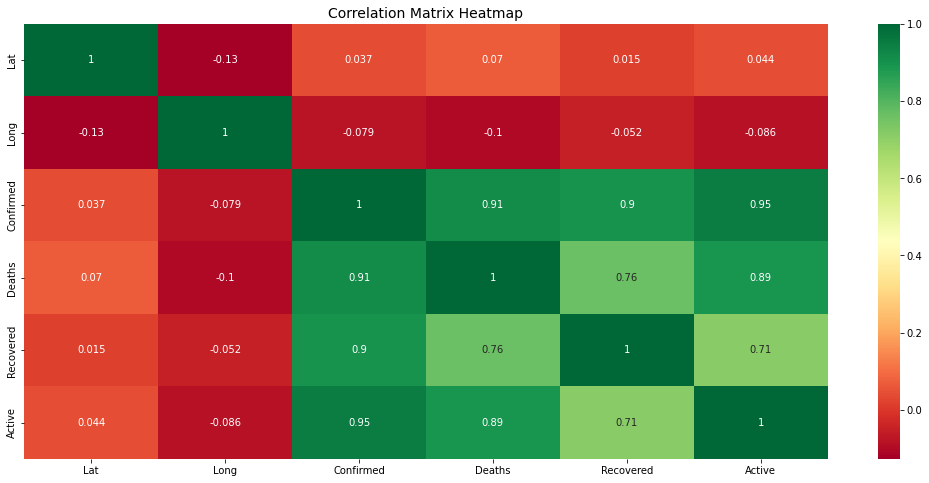

In [16]:
# Create a correlation MATRIX HEATMAP (colored)

f = plt.figure(figsize=(18, 8)) # figure size 
cor_mat = df.corr()   # get the correlation matrix
h_map = sns.heatmap(data=cor_mat, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix Heatmap', fontsize=14) # add title

### A correlation analysis returns a matrix of coefficients that indicate the level of interdependence between the variables:
 <ul>
<li>0: no relationship</li>
<li>0.1–0.3: weak relationship</li>
<li>0.3–0.5: moderate relationship</li>
<li>0.5–1.0: strong relationship</li>
  </ul>

### Based on the coefficient values above multiple insights can be made on relationships between variables:
<ul>
<li>A strong realtionship (.95) is noted between the amount of ACTIVE cases and CONFIRMED cases which is likely due to testing of the COVID-19 virus, the more Nasal swab tests produce COVID-19 + CONFIRMED cases, the more the number of ACTIVE cases are added to the pool. </li>
<li>A strong relationship (.90) is also noted between the amount of RECOVERED cases and CONFIRMED cases again which is likely due to testing of the COVID-19 virus, the more Nasal swab tests produce COVID-19 + CONFIRMED cases, fortunately, the more the number go on to recover from the deadly virus and add to the pool of RECOVERED cases.</li>
<li>A strong relationship (.91) is noted between COVID-19 + CONFIRMED cases and DEATHS, which is not good news, meaning if you test positive for COVID-19, you are more likely to die form the disease. </li>
<li>A relatively strong relationship (.89) is noted between ACTIVE cases and DEATHS, for the same reason just mentioned that if Active COVID-19 infection, you are more likely to die form the disease. </li>
<li>Surprisingly, a mildly strong relationship (.76) is noted between RECOVERED cases and DEATHS, which is a bit frightening as death may result due to sequela (after effects) of the COVID-19 virus. </li>
<li>A strange anomaly is noted with the LONGITUDE and LATITUDES data. We see from the heatmap above that there is a relative NEGATIVE relationships are noted among all the variables and LONGITUDES, conversely, weakly positive relationships are noted among all variables and LATITUDES. This could lead one to believe that being at a POSITVE LATITUDE could infer increased infectivity and being at a NEGATIVE LONGITUDE could decrease your chances of being infected? More analysis is needed to gain insight. </li>
  </ul>

### <ul><li>Scatterplots<ul>

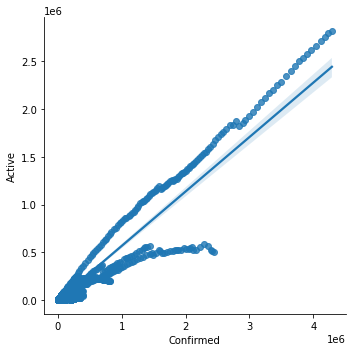

In [17]:
# Create a scatterplot for the "Active" and "Confirmed" columns

sns.lmplot(x = 'Confirmed', y = 'Active', data = df)

<li>A postive correlation is noted between the amount of ACTIVE cases and CONFIRMED cases which is likely due to testing of the COVID-19 virus, the more Nasal swab tests produce COVID-19 + CONFIRMED cases, the more the number of ACTIVE cases are added to the pool. </li>

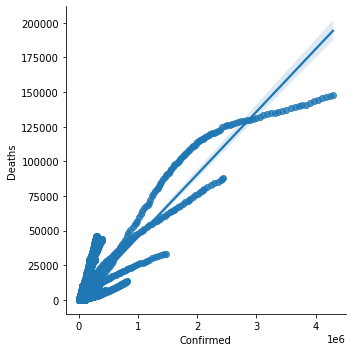

In [18]:
# Create a scatterplot for the "Deaths" and "Confirmed" columns

sns.lmplot(x = 'Confirmed', y = 'Deaths', data = df)

<li>A relatively strong correlation is noted between COVID-19 + CONFIRMED cases and DEATHS, which is not good news, meaning if you test positive for COVID-19, you are more likely to die form the disease. </li>

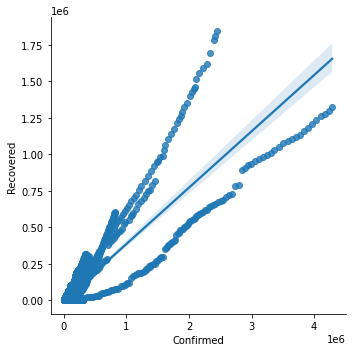

In [19]:
# Create a scatterplot for the "Recovered" and "Confirmed" columns

sns.lmplot(x = 'Confirmed', y = 'Recovered', data = df)

<li>A mildly strong correlation is also noted between the amount of RECOVERED cases and CONFIRMED cases again which is likely due to testing of the COVID-19 virus, the more Nasal swab tests produce COVID-19 + CONFIRMED cases, fortunately, the more the number go on to recover from the deadly virus and add to the pool of RECOVERED cases. </li>

 ### <ul><li>Pair Plots<ul>

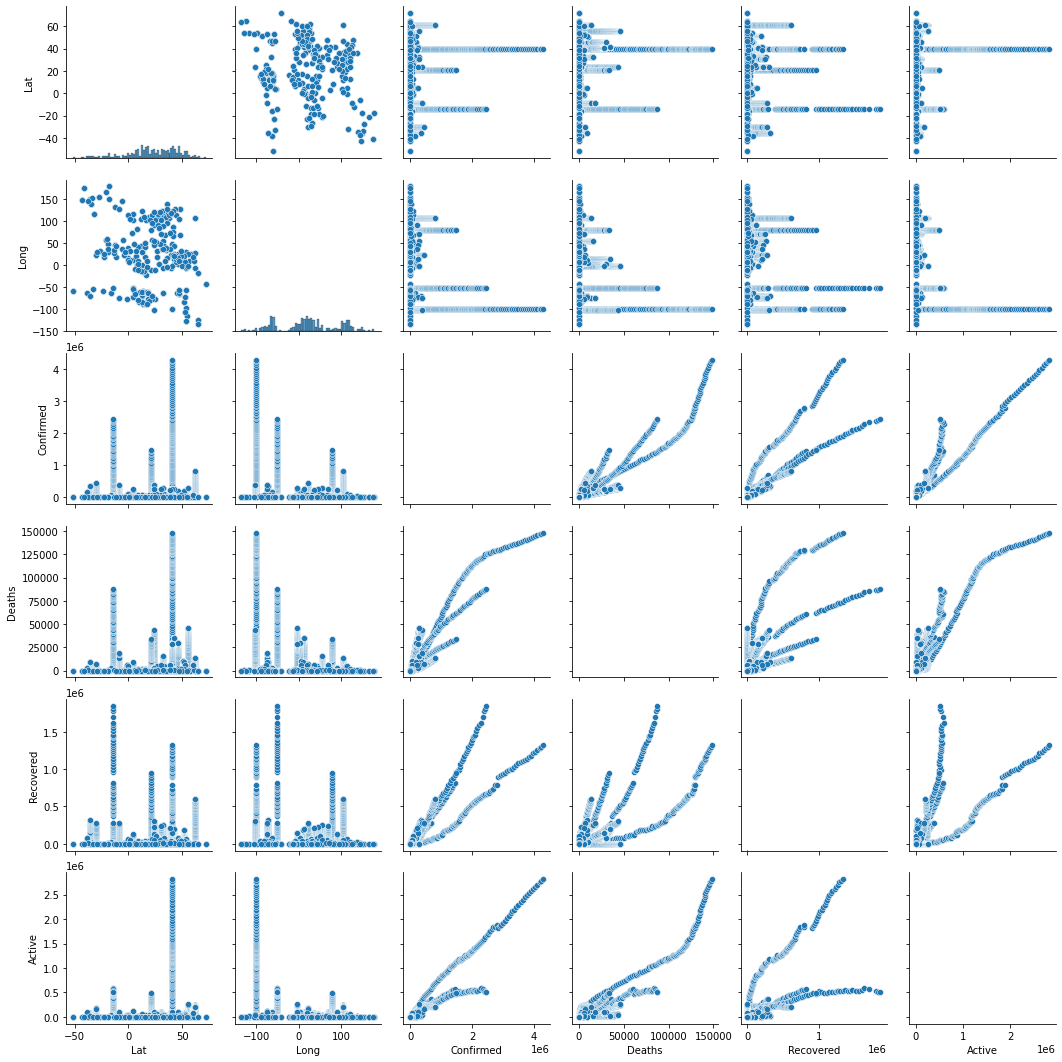

In [28]:
# Create a pair plot of entire data set

g = sns.pairplot(df)

<li>Pair Plots re-enforce the correlations analysis we have already noted. I would like to look at in the future, based on these plots, the number of active cases that resulted in deaths.  </li>

### <ul><li>Categorical Plot<ul>

In [141]:
#Import US specific data

df1= pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'US_COVID_DATA.csv'))

<AxesSubplot:xlabel='Active', ylabel='Count'>

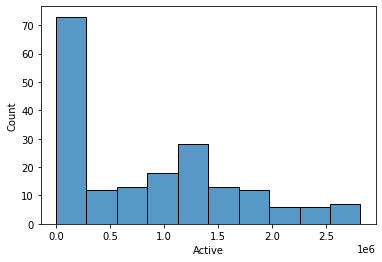

In [142]:
sns.histplot(df1['Active'], bins = 10)

In [148]:
df1.loc[df1['Active'] <= 1.0, 'Active Cases Category'] = 'Highly Infectious'

In [149]:
df1.loc[(df1['Active'] >= 1.0) & (df['Active'] < 1.5), 'Active Cases Category'] = 'Mildly Infectious'

In [150]:
df1.loc[df1['Active'] >= 1.5, 'Active Cases Category'] = 'Less Infectious'

In [151]:
df1['Active Cases Category'].value_counts(dropna = False)

Less Infectious      186
Mildly Infectious      2
Name: Active Cases Category, dtype: int64

In [152]:
df1.columns

Index(['Country', 'Deaths', 'Date', 'Confirmed', 'Recovered', 'Active',
       'Active Cases Category'],
      dtype='object')

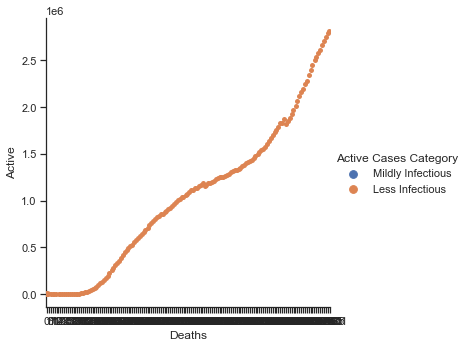

In [154]:
sns.set(style="ticks")
g = sns.catplot(x="Deaths", y="Active", hue="Active Cases Category", data=df1)

<li>The Categorical plot above shows us that there are less infectious indviduals over the course of deaths, meaning that deaths may have been constant as more people ith active with the infection  </li>

# Previous questions posed and new ones arisen.

### Over the course of this study and graphical trends answer the questions of COVID-19 infections increasing over the time period studied. 

### We still need to do studies on where infectious active cases are the highest.

### Although we have noted incresed deaths as cases are confirmed, we need more country specific analysis to see where deaths and activie infecitous are increasing. 

# Hypotheses 

### If there are increased number of confirmed and active infections in a region of the world, therefore there will be an increased number of deaths.